<a href="https://colab.research.google.com/github/el-thobhy/rainfall-prediction/blob/master/test_code_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install -q kaggle

In [117]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [118]:
!chmod 600 /content/kaggle.json

In [119]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d datahmifitb/ds-bootcamp-curah-hujan

ds-bootcamp-curah-hujan.zip: Skipping, found more recently modified local copy (use --force to force download)


In [120]:
import zipfile

local_zip = '/content/ds-bootcamp-curah-hujan.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import pandas as pd

c:\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
# df = pd.read_csv('/content/data.csv')
df = pd.read_csv('data.csv')
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [7]:
df["sunrise (iso8601)"][0]

'2018-01-01T05:15'

In [8]:
df.sort_values(by=['time'], inplace=True, ascending=True)
df.set_index('time', inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13258 entries, 2018-01-01 to 2022-12-28
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature_2m_max (°C)          13208 non-null  float64
 1   temperature_2m_min (°C)          13208 non-null  float64
 2   apparent_temperature_max (°C)    13208 non-null  float64
 3   apparent_temperature_min (°C)    13208 non-null  float64
 4   sunrise (iso8601)                13258 non-null  object 
 5   sunset (iso8601)                 13258 non-null  object 
 6   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 7   rain_sum (mm)                    13198 non-null  float64
 8   snowfall_sum (cm)                13198 non-null  float64
 9   windspeed_10m_max (km/h)         13208 non-null  float64
 10  windgusts_10m_max (km/h)         13208 non-null  float64
 11  winddirection_10m_dominant (°)   12792 non-null  float64
 12  et0_fao_e

In [10]:
df = df.drop(df.columns[[4, 5, 8, 13, 14]], axis=1)

In [11]:
df.isnull().sum()

temperature_2m_max (°C)             50
temperature_2m_min (°C)             50
apparent_temperature_max (°C)       50
apparent_temperature_min (°C)       50
shortwave_radiation_sum (MJ/m²)     60
rain_sum (mm)                       60
windspeed_10m_max (km/h)            50
windgusts_10m_max (km/h)            50
winddirection_10m_dominant (°)     466
et0_fao_evapotranspiration (mm)     60
dtype: int64

In [12]:
df = df.dropna(how='any',axis=0) 

In [130]:
df.isnull().sum()

temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
shortwave_radiation_sum (MJ/m²)    0
rain_sum (mm)                      0
windspeed_10m_max (km/h)           0
windgusts_10m_max (km/h)           0
winddirection_10m_dominant (°)     0
et0_fao_evapotranspiration (mm)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12792 entries, 2018-01-01 to 2021-08-01
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   temperature_2m_max (°C)          12792 non-null  float64
 1   temperature_2m_min (°C)          12792 non-null  float64
 2   apparent_temperature_max (°C)    12792 non-null  float64
 3   apparent_temperature_min (°C)    12792 non-null  float64
 4   shortwave_radiation_sum (MJ/m²)  12792 non-null  float64
 5   rain_sum (mm)                    12792 non-null  float64
 6   windspeed_10m_max (km/h)         12792 non-null  float64
 7   windgusts_10m_max (km/h)         12792 non-null  float64
 8   winddirection_10m_dominant (°)   12792 non-null  float64
 9   et0_fao_evapotranspiration (mm)  12792 non-null  float64
dtypes: float64(10)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='temperature_2m_max (°C)'>

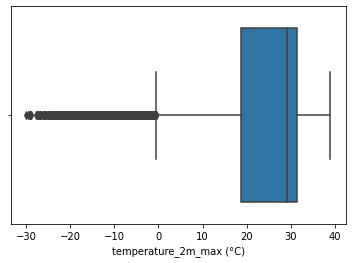

In [14]:
import seaborn as sns
sns.boxplot(x=df['temperature_2m_max (°C)'])

<AxesSubplot:xlabel='temperature_2m_min (°C)'>

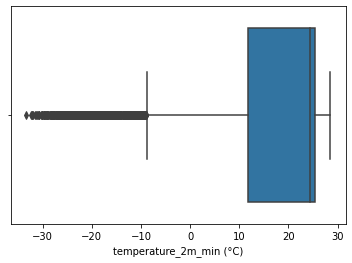

In [15]:
sns.boxplot(x=df['temperature_2m_min (°C)'])

<AxesSubplot:xlabel='apparent_temperature_max (°C)'>

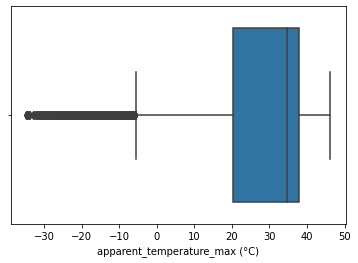

In [16]:

sns.boxplot(x=df['apparent_temperature_max (°C)'])

<AxesSubplot:xlabel='apparent_temperature_min (°C)'>

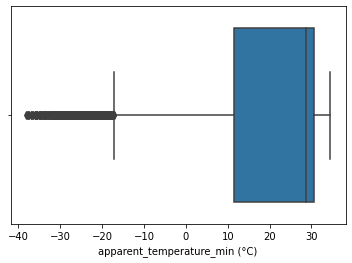

In [17]:

sns.boxplot(x=df['apparent_temperature_min (°C)'])

<AxesSubplot:xlabel='shortwave_radiation_sum (MJ/m²)'>

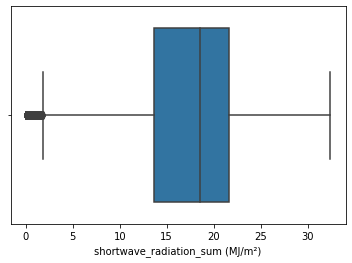

In [18]:

sns.boxplot(x=df['shortwave_radiation_sum (MJ/m²)'])

<AxesSubplot:xlabel='rain_sum (mm)'>

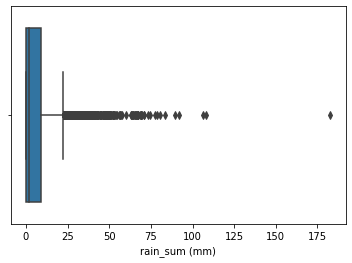

In [19]:

sns.boxplot(x=df['rain_sum (mm)'])

<AxesSubplot:xlabel='windspeed_10m_max (km/h)'>

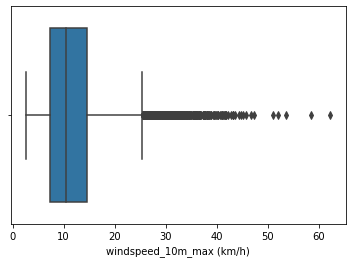

In [20]:

sns.boxplot(x=df['windspeed_10m_max (km/h)'])

<AxesSubplot:xlabel='windgusts_10m_max (km/h)'>

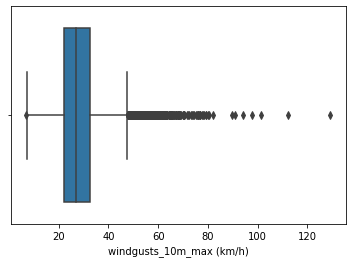

In [21]:

sns.boxplot(x=df['windgusts_10m_max (km/h)'])

<AxesSubplot:xlabel='winddirection_10m_dominant (°)'>

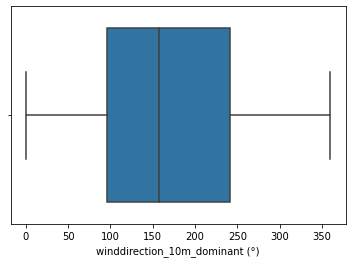

In [22]:

sns.boxplot(x=df['winddirection_10m_dominant (°)'])

<AxesSubplot:xlabel='et0_fao_evapotranspiration (mm)'>

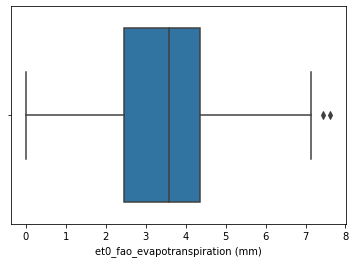

In [23]:

sns.boxplot(x=df['et0_fao_evapotranspiration (mm)'])

In [142]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(10549, 10)

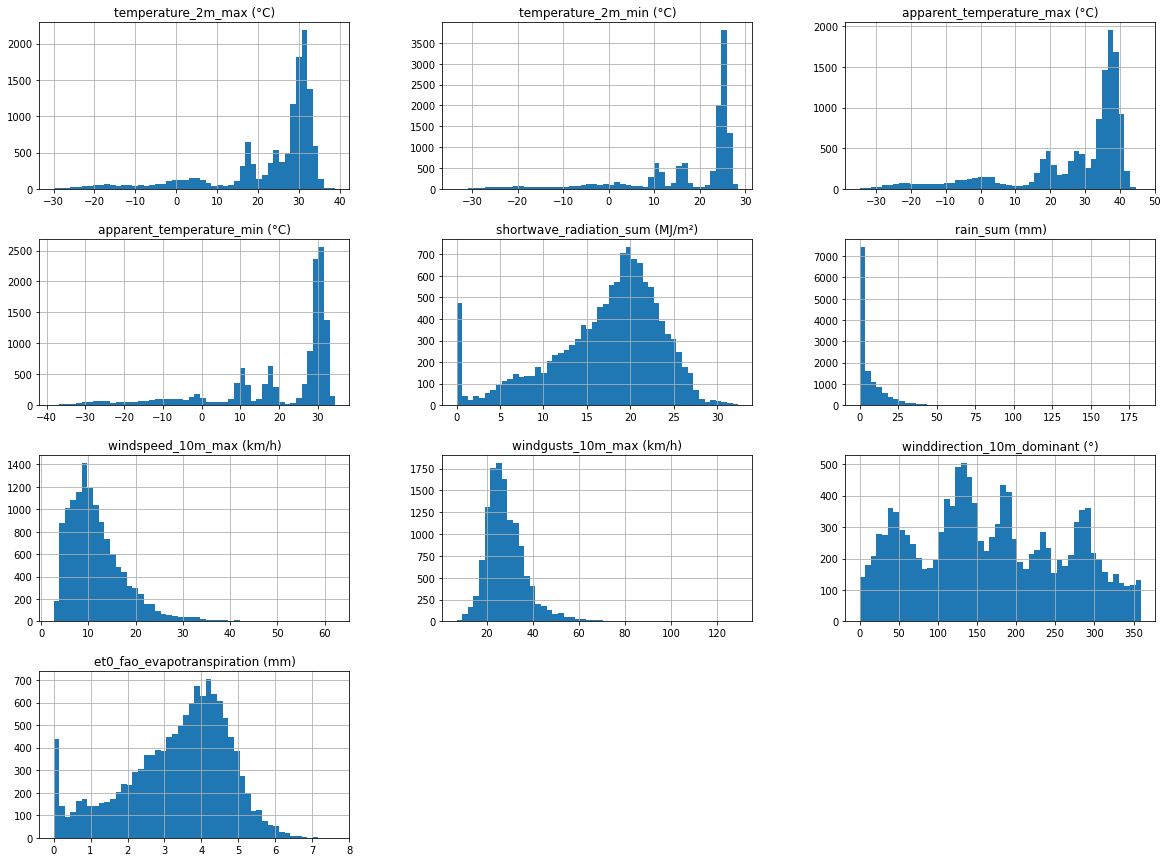

In [24]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

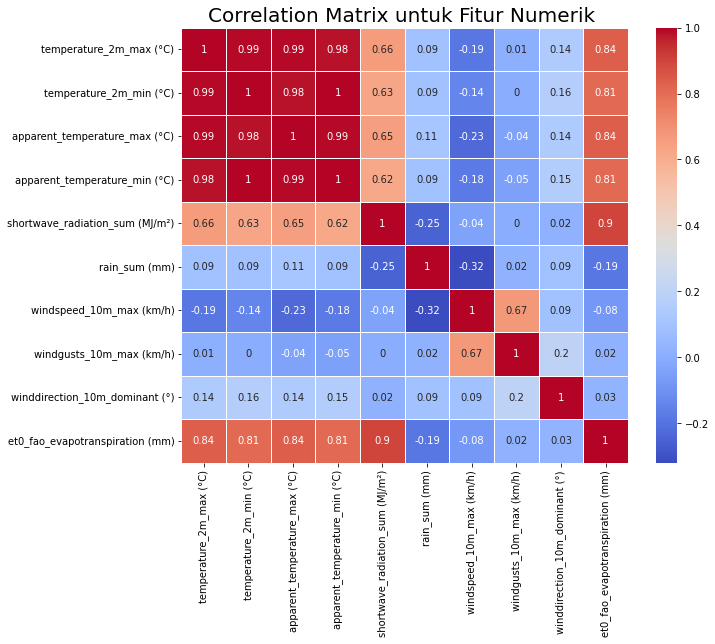

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [30]:
from sklearn import preprocessing

df_new = df
X = df_new.drop(['rain_sum (mm)'], axis=1)
X = X = preprocessing.scale(X)

In [31]:
y = df_new['rain_sum (mm)']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [50]:
from scipy.stats import uniform
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': uniform(0.01, 0.2)
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor

# Define the XGBoost model
xgb_model = XGBRegressor()

# Perform random search
search = RandomizedSearchCV(
    xgb_model, param_distributions=params, 
    n_iter=20, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1
    )
search.fit(X_train, y_train)


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          min_child_weight=None, missing=nan,
                             

In [51]:
import numpy as np
# Print the best hyperparameters and mean squared error
print("Best hyperparameters: ", search.best_params_)
print("RMSE: ", np.sqrt(-search.best_score_))


Best hyperparameters:  {'learning_rate': 0.08272194189686247, 'max_depth': 3, 'n_estimators': 300}
RMSE:  6.17716097507909


In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Train and evaluate the model with best hyperparameters on the validation set
best_xgb_model = XGBRegressor(**search.best_params_)
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("test RMSE: ", np.sqrt(mse))

test RMSE:  5.936035068741789


In [53]:
pred_dict = {'y_actual' :y_test}
data_baru = pd.DataFrame(pred_dict)
data_baru['pred'] = y_pred
data_baru.head()

,y_actual,pred
time,,
2021-05-28,23.6,12.438542
2018-06-11,0.7,4.195853
2019-03-21,2.1,6.135313
2020-11-16,3.6,3.901083
2019-10-16,0.7,0.053562


<AxesSubplot:xlabel='time'>

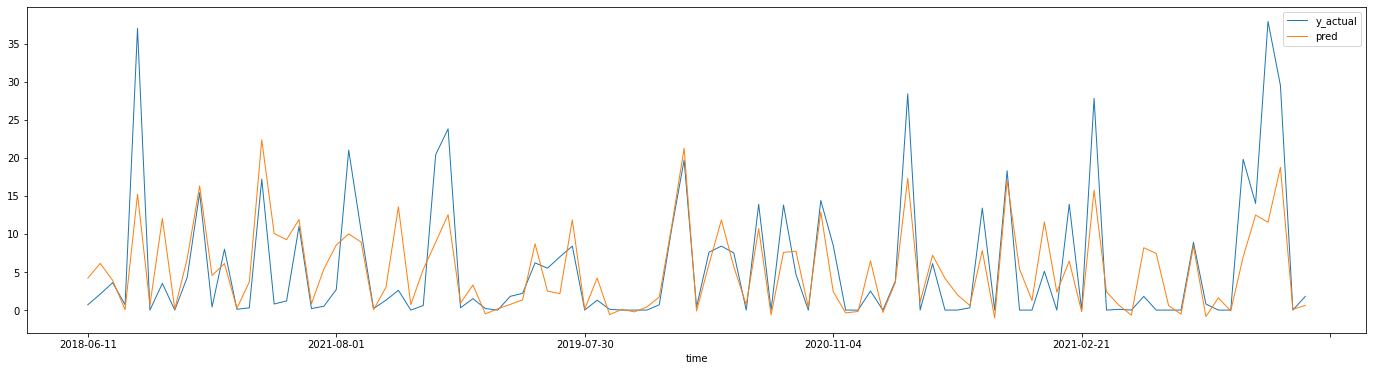

In [54]:
data_baru.iloc[1:100].plot.line(figsize=(24,6),lw=1)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18180\3253366377.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


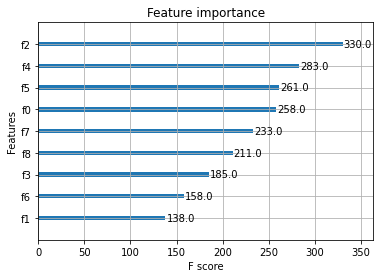

In [55]:
from xgboost import plot_importance
ax = plot_importance(best_xgb_model)
fig = ax.figure
fig.show()

In [57]:
import pandas as pd

params_key = [f"param_{p}" for p in params.keys()]
params_values = [v for v in params.values()]
RMSE = []
results=search.cv_results_
for mean_score in results["mean_test_score"]:
    RMSE.append((np.sqrt(-mean_score)))

df_result = pd.DataFrame(results)
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_fit_time        20 non-null     float64
 1   std_fit_time         20 non-null     float64
 2   mean_score_time      20 non-null     float64
 3   std_score_time       20 non-null     float64
 4   param_learning_rate  20 non-null     object 
 5   param_max_depth      20 non-null     object 
 6   param_n_estimators   20 non-null     object 
 7   params               20 non-null     object 
 8   split0_test_score    20 non-null     float64
 9   split1_test_score    20 non-null     float64
 10  split2_test_score    20 non-null     float64
 11  split3_test_score    20 non-null     float64
 12  split4_test_score    20 non-null     float64
 13  split5_test_score    20 non-null     float64
 14  split6_test_score    20 non-null     float64
 15  split7_test_score    20 non-null     float

In [58]:
root_mean_square_error = {}
root_mean_square_error['root_mean_square_error'] = RMSE
results = search.cv_results_
results['root_mean_square_error'] = RMSE

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# create a dataframe from results
fig = px.scatter_3d(results, x = params_key[0], 
                    y = params_key[1], 
                    z = params_key[2],
                    color = 'root_mean_square_error')
fig.update_layout(coloraxis_colorbar_title='RMSE')
fig.show()
